In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[1.66542163e-01 1.59654687e-02 9.66137527e-02 ... 1.45122723e-01
  6.38046269e-01 1.29064283e-01]
 [9.37269326e-02 8.98507851e-03 5.43724816e-02 ... 8.16724573e-02
  3.59080960e-01 7.26350561e-02]
 [3.39128519e-03 3.25103605e-04 1.96733838e-03 ... 2.95512279e-03
  1.29924869e-02 2.62812602e-03]
 ...
 [1.56535834e-01 1.50062177e-02 9.08089224e-02 ... 1.36403335e-01
  5.99710626e-01 1.21309732e-01]
 [9.84452893e-02 9.43740106e-03 5.71096753e-02 ... 8.57839733e-02
  3.77157643e-01 7.62916156e-02]
 [2.01736042e-01 1.93393097e-02 1.17030281e-01 ... 1.75790222e-01
  7.72878934e-01 1.56338294e-01]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.18882343 -0.1917271   0.19622263 ...  0.38580777  0.75039636
   0.15995821]
 [-0.06766741  0.04268088 -0.09483506 ... -0.00136867  0.16055586
   0.25983132]
 [-0.1393941  -0.02682048 -0.0134064  ...  0.09249297  0.03877768
  -0.06035897]
 ...
 [ 0.19386219 -0.00949753  0.20726505 ...  0.04288965  0.63999212
  -0.08475488

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[ 0.03735545  0.34050119 -0.00367883 -0.10096413 -0.16442782 -0.15154351
 -0.15479052  0.02147721 -0.04391956 -0.1757216   0.09576304 -0.09850588
 -0.25055482 -0.09538628  0.11144677 -0.22652751 -0.01502387 -0.37854091
  0.03450351  0.28693619  0.10281424  0.19439402 -0.21948574 -0.04091218
  0.10988164  0.08430826 -0.21287908  0.24363153 -0.09949383  0.11682668
  0.29576234  0.08028484  0.01271074  0.01316319 -0.37803013  0.17381963
 -0.07610473  0.4037516   0.11161319 -0.01629792 -0.15452805 -0.29648806
  0.01087781 -0.03678532 -0.23400958  0.21228215 -0.15824456 -0.03919958
  0.05744938  0.04873992]
[-0.13281142  0.08767308  0.10633747 -0.05593441 -0.04714042  0.07019889
 -0.03245856 -0.11235168 -0.04277251 -0.06901871 -0.17368538 -0.24599796
  0.04734182  0.0410403   0.19267794 -0.0851177  -0.05274361 -0.00578903
 -0.02853659 -0.15927704 -0.20521133 -0.15835168  0.2279423  -0.15050787
  0.06415713  0.06816463 -0.15998244  0.0102868   0

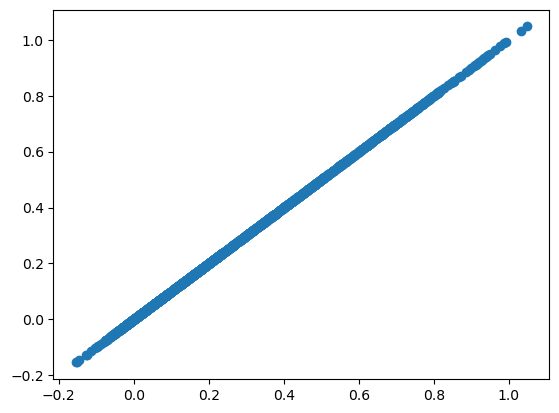

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

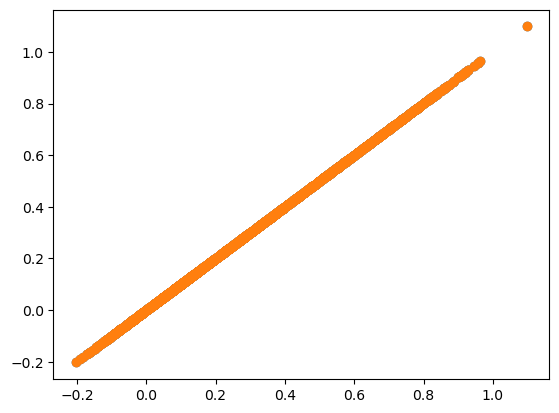

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878],
       [149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878],
       [149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878],
       ...,
       [149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878],
       [149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878],
       [149.2844878, 149.2844878, 149.2844878, ..., 149.2844878,
        149.2844878, 149.2844878]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.05889569, -0.00460939, -0.03660545, -0.05565157, -0.03605065,
        -0.23035058, -0.07253692, -0.00069033, -0.22524548, -0.1081833 ,
        -0.06251084, -0.19292217, -0.24478296, -0.01602418, -0.09596402,
        -0.21138886, -0.1243943 , -0.04958639, -0.12732793, -0.22355882,
        -0.14949039, -0.10049975, -0.15560653, -0.19275387, -0.22501799,
        -0.24981104, -0.19732745, -0.22445269, -0.25005198, -0.06907046,
        -0.1645299 ,  0.00612105, -0.06357942, -0.2252082 , -0.20044493,
        -0.15794407, -0.25883519, -0.05951999, -0.21632307, -0.05090811]),
 array([0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847,
        0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847,
        0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847,
        0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847,
        0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847, 0.0051847,
        0.0051847, 0.0051847, 0.0051847, 0.0

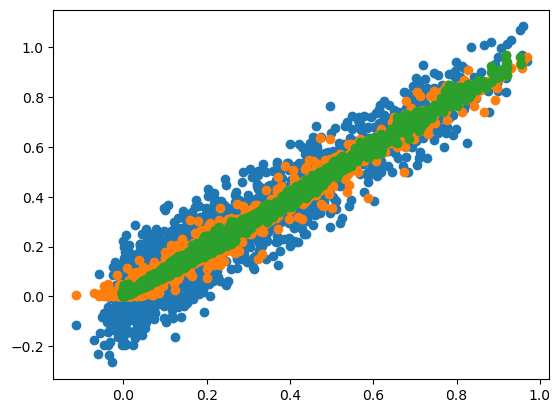

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


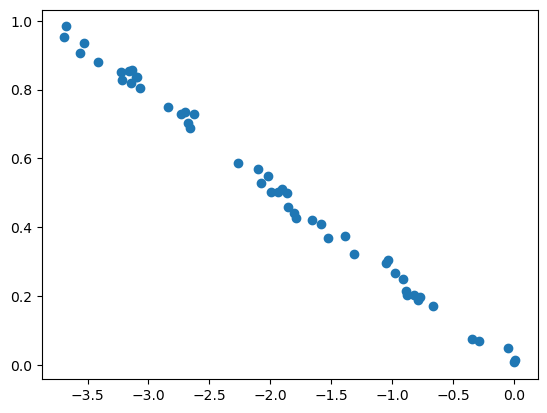

In [12]:
plt.scatter(mycebmf.L[:,0], u)

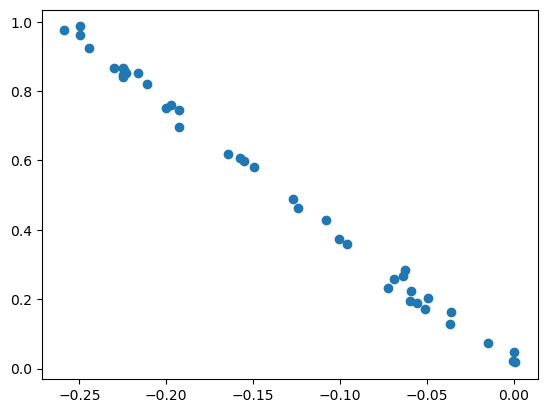

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([ 0.00803268,  0.28997071, -0.00077815, -0.0333784 , -0.09340493,
       -0.07666513, -0.07997728,  0.0041894 , -0.0101925 , -0.10663663,
        0.02977058, -0.03302315, -0.20367498, -0.03078508,  0.03864987,
       -0.17618787, -0.00334637, -0.32555161,  0.00745661,  0.24004741,
        0.03422008,  0.1276374 , -0.1668453 , -0.00968712,  0.03891765,
        0.02434722, -0.15732509,  0.19296855, -0.0328085 ,  0.0428181 ,
        0.24834923,  0.02228223,  0.00245265,  0.00242638, -0.32446147,
        0.10167782, -0.02153455,  0.34441948,  0.03982127, -0.00390704,
       -0.08031779, -0.25121639,  0.00223337, -0.00842588, -0.18413207,
        0.1536595 , -0.0858674 , -0.00933182,  0.01385544,  0.01095117])

In [15]:
for i in range(40):
    mycebmf.iter()

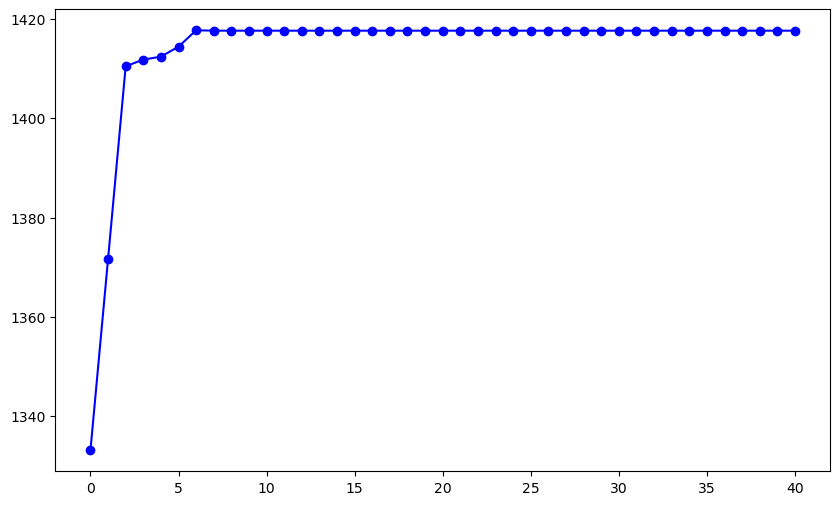

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [17]:

k=1
mask = ~np.isnan(Z)  # Assuming the mask is related to Z having no NaNs

tau= mycebmf.tau
nu=L[:,k] 
omega=mycebmf.L2[:,k]
Z= mycebmf.Y_fit
numerator_f_hat = np.sum(tau * Z * mask * nu[:, np.newaxis], axis=0)  # Sum over i (axis=0)
denominator_f_hat = np.sum(tau * mask * omega[:, np.newaxis], axis=0)
# Set tau to 0 wherever Z has nan values
 
    # Compute f_hat


NameError: name 'Z' is not defined

In [ ]:
denominator_f_hat.any()==0

In [ ]:
s_f = (denominator_f_hat) ** (-0.5)+ 1e-32     
    # Compute s_f
if  denominator_f_hat.any()==0:
    idx=  np.where((denominator_f_hat == 0))[0]
    s_f[idx]= 10*np.abs(denominator_f_hat[idx]) +1e-16
 

In [ ]:
np.abs(-9)